# Effect Size Analysis

### 1.  Introduction
Define with hypothesis tests what kind of difference in effect we want to prove
- d-cohen between ms and hc
- d-cohen time of the day, morning vs afternoon
- d-cohen practice effect, do the people learn after certain time? k weeks? x number of tests later?

In statistics, an effect size is a quantitative measure of the strength of a phenomenon.[1] Examples of effect sizes are the correlation between two variables, the regression coefficient in a regression, the mean difference, or even the risk with which something happens, such as how many people survive after a heart attack for every one person that does not survive. For each type of effect size, a larger absolute value always indicates a stronger effect [here](https://en.wikipedia.org/wiki/Effect_size)

In [1]:
import sys
import pandas as pd
import numpy as np #si
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from scipy import stats #usamos
from math import *
from dateutil.parser import parse as parse_datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from ggplot import *
from math import *

In [3]:
sys.path.insert(0, '/Users/pedrohserrano/SDMT-Analysis/utils') #internal packages
import buildms as ms 
import statsms as stms
color_ms = '#386cb0' #blue, This is the color chosen for patients with Multiple Sclerosis
color_hc = 'red'#This is the color chosen for health control participants

---
### 1.1 Datasets

In [1]:
!python ~/SDMT-Analysis/utils/create_dataset.py ~/SDMT-Analysis/data/processed/mijn-kwik-may.csv

Percetnage of missing values: 26.309124185727793
Max answers: 61
Min score: 7 Max score: 67 Mean score: 45.861979166666664
Percentage of MS in Dataset: 65.0 %
... Dataset df_measures_users.csv created
... Dataset df_measures.csv created


In [5]:
df_measures = pd.read_csv('~/SDMT-Analysis/data/interim/df_measures.csv', encoding="utf-8")

In [6]:
df_measures_users = pd.read_csv('~/SDMT-Analysis/data/interim/df_measures_users.csv', encoding="utf-8")

In [7]:
df_measures_users.head()

,userId,correct.answers,total.answers,accuracy.rate,avg_test_ms,hour,ms,events,timestamp
0,3ZJxRxNFMbsihHc9n,46.571429,46.785714,0.995363,3739.428571,16.000000,1.0,14,2017-06-01 10:18:49.461
1,3sLik5kugaynxduWs,58.888889,59.222222,0.993975,2961.222222,14.555556,0.0,9,2017-07-01 11:19:43.217
2,6tzxzhSYpdi74TZth,57.000000,57.818182,0.985656,3053.090909,16.000000,1.0,11,2017-06-28 15:59:05.888
3,7wCDFJMaqeZnFT93S,52.444444,53.444444,0.981066,3259.777778,16.222222,1.0,9,2017-07-07 17:24:13.736
4,9BjE8bBgbi878bLbK,54.500000,54.833333,0.994017,3191.000000,11.083333,1.0,12,2017-06-15 10:26:06.894


## 2. Methods

##### Cohen's effect size

There is one other common way to express the difference between distributions.  Cohen's $d$ is the difference in means, standardized by dividing by the standard deviation.  Here's the math notation:

$$ d = \frac{\bar{x}_1 - \bar{x}_2} s $$

where $s$ is the pooled standard deviation:

$$s = \sqrt{\frac{(n_1-1)s^2_1 + (n_2-1)s^2_2}{n_1+n_2 - 2}}$$


In [8]:
score_variable = 'correct.answers'

### 2.1 Difference of Groups

Split the patients MS (Multiple Sclerosis) and HC (Health Control)

In [15]:
summary_ms = df_measures_users[df_measures_users['ms']==1][score_variable].describe()
print('Average Score of MS Group: {} (SD {})'.format(
    round(summary_ms.loc['mean'],2), round(summary_ms.loc['std'],2)))

Average Score of MS Group: 46.22 (SD 7.88)


In [16]:
summary_hc = df_measures_users[df_measures_users['ms']==0][score_variable].describe()
print('Average Score of HC Group: {} (SD {})'.format(
    round(summary_hc.loc['mean'],2), round(summary_hc.loc['std'],2)))  

Average Score of HC Group: 52.92 (SD 8.22)


In [17]:
cohens_d = stms.dCohen(df_measures_users[df_measures_users['ms']==1][score_variable],
                       df_measures_users[df_measures_users['ms']==0][score_variable]).effect_size()
print('Cohen`s d-value: {}'.format(round(cohens_d,3)))

Cohen`s d-value: 0.837


|Study|Difference Value|Benchmark|
|---|---|---|
|Benedict 2016 | $d=1.11$ | Large (Cohen, 1988)|
|**Orikami 2017**| $d=0.837$ |Large (Cohen, 1988)|

There's a significative difference between the scores performed on MS against HC, we are able to say that those are groups with different characteristics

What d-Cohen means is that if there was no difference between the two groups, that is, they are the same, then the probability of guessing which of the two groups comes from just seeing their scores would be that of a flown, Or 50%, then the bigger the d is made, the clearer it is to see the difference of the scores just guessing

### 2.2 Difference on Time of the Day

Is there any difference if the participants respond in the morning or in the afternoon?

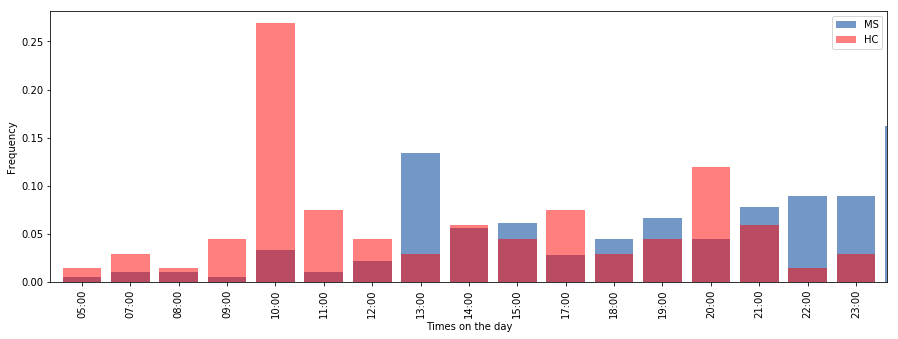

In [18]:
plt.figure(figsize=[15, 5])

times = pd.Series(df_measures[df_measures['ms']==1]['timestamp']).map(
    lambda x: '{:02}:00'.format(parse_datetime(str(x)).hour))
time_counts = times.value_counts().sort_index()
relative = time_counts/time_counts.sum()
relative.plot(kind='bar', width=0.8, alpha=0.7, color=color_ms, label='MS')

times = pd.Series(df_measures[df_measures['ms']==0]['timestamp']).map(
    lambda x: '{:02}:00'.format(parse_datetime(str(x)).hour))
time_counts = times.value_counts().sort_index()
relative = time_counts/time_counts.sum()
relative.plot(kind='bar', width=0.8, alpha=0.5, color=color_hc, label='HC')

plt.xlabel('Times on the day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [44]:
# This is the tradeoff to decide morning and afternoon
print('The half percent of the distribution, median: {}'.format(df_measures['hour'].median()))

The half percent of the distribution, median: 15.0


Split two groups, Morning and Afternoon of MS and HC subgroup

In [380]:
df_ms = df_measures[df_measures['ms']==1]
df_hc = df_measures[df_measures['ms']==0]

In [255]:
m_ms = df_ms[df_ms['hour'] < df_ms['hour'].median()]
a_ms = df_ms[df_ms['hour'] >= df_ms['hour'].median()]
m_hc = df_hc[df_hc['hour'] < df_hc['hour'].median()]
a_hc = df_hc[df_hc['hour'] >= df_hc['hour'].median()]

In [253]:
d1 = stms.dCohen(m_ms[score_variable], a_ms[score_variable]).effect_size()
d2 = stms.dCohen(m_hc[score_variable], a_hc[score_variable]).effect_size()
print('Cohen´s d-value: \n MS: {} \n HC: {}'.format(round(d1,3),round(d2,3)))

Cohen´s d-value: 
 MS: 0.209 
 HC: 0.133


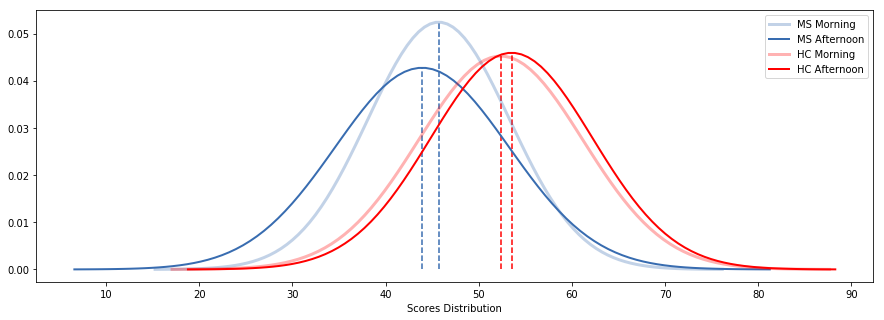

MS Morning: 45.7 (SD 7.61)
MS Afternoon: 43.92 (SD 9.33)
HC Morning: 52.36 (SD 8.82)
HC Afternoon: 53.53 (SD 8.68)


In [403]:
from scipy import stats
plt.figure(figsize=(15, 5))

norm1 = stats.norm(m_ms[score_variable].mean(), m_ms[score_variable].std())
xs, ys = stms.MSstats(norm1).eval_pdf()
plt.plot(xs, ys, label='MS Morning', linewidth=3, color=color_ms, alpha=0.3)
plt.vlines(x=m_ms[score_variable].mean(),ymin=0,ymax=max(ys), color=color_ms, linestyles='--')

norm2 = stats.norm(a_ms[score_variable].mean(), a_ms[score_variable].std())
xs, ys = stms.MSstats(norm2).eval_pdf()
plt.plot(xs, ys, label='MS Afternoon', linewidth=2, color=color_ms)
plt.vlines(x=a_ms[score_variable].mean(),ymin=0,ymax=max(ys), color=color_ms, linestyles='--')

norm3 = stats.norm(m_hc[score_variable].mean(), m_hc[score_variable].std())
xs, ys = stms.MSstats(norm3).eval_pdf()
plt.plot(xs, ys, label='HC Morning', linewidth=3, color=color_hc, alpha=0.3)
plt.vlines(x=m_hc[score_variable].mean(),ymin=0,ymax=max(ys), color=color_hc, linestyles='--')

norm4 = stats.norm(a_hc[score_variable].mean(), a_hc[score_variable].std())
xs, ys = stms.MSstats(norm4).eval_pdf()
plt.plot(xs, ys, label='HC Afternoon', linewidth=2, color=color_hc)
plt.vlines(x=a_hc[score_variable].mean(),ymin=0,ymax=max(ys), color=color_hc, linestyles='--')


plt.xlabel('Scores Distribution'); plt.legend(loc='best'); plt.show()
print('MS Morning: {} (SD {})'.format(round(m_ms[score_variable].mean(),2), round(m_ms[score_variable].std(),2)))
print('MS Afternoon: {} (SD {})'.format(round(a_ms[score_variable].mean(),2), round(a_ms[score_variable].std(),2)))
print('HC Morning: {} (SD {})'.format(round(m_hc[score_variable].mean(),2), round(m_hc[score_variable].std(),2)))
print('HC Afternoon: {} (SD {})'.format(round(a_hc[score_variable].mean(),2), round(a_hc[score_variable].std(),2)))

There's not significance difference between means, so it means that a person is going to score alike no matter the moment on the day. But in the other hand is clearly to see that respond in the morning for MS group is presumably less variance

##### F - test Variance Difference

$$F={\frac  {S_{X}^{2}}{S_{Y}^{2}}}$$

Has an F-distribution with n − 1 and m − 1 degrees of freedom if the null hypothesis of equality of variances is true. Otherwise it has a non-central F-distribution. The null hypothesis is rejected if F is either too large or too small.

In [264]:
F_ms = m_ms[score_variable].var() / a_ms[score_variable].var()
degrees1ms = len(m_ms[score_variable]) -1
degrees2ms = len(a_ms[score_variable]) -1

In [265]:
print('Difference in Variance for MS: {}%  p-value: {}'.format(
    round(F_ms*100,2), stats.f.cdf(F_ms, degrees1ms, degrees2ms)))

Difference in Variance for MS: 66.52%  p-value: 0.028578312903474887


In [266]:
#F_hc = m_hc[score_variable].var() / a_hc[score_variable].var()
F_hc = a_hc[score_variable].var() / m_hc[score_variable].var()
degrees1hc = len(m_hc[score_variable]) -1
degrees2hc = len(a_hc[score_variable]) -1

In [267]:
print('Difference in Variance for HC: {}%  p-value: {}'.format(
    round(F_hc*100,2), stats.f.cdf(F_hc, degrees1hc, degrees2hc)))

Difference in Variance for HC: 97.0%  p-value: 0.4664223119264743


There's an statistical significant difference between the variance between morning and afternoon on MS group, it means that people perform more constant over the time if they respond in the morning, in the other hand, it shows also a big difference for HC, but we got a big p-value, so we cannot reject the null hypothesis for HC group

### 2.3 Difference Day of The Week

In [379]:
df_measures['weekday'] = [parse_datetime(x).weekday() for x in df_measures['day']]

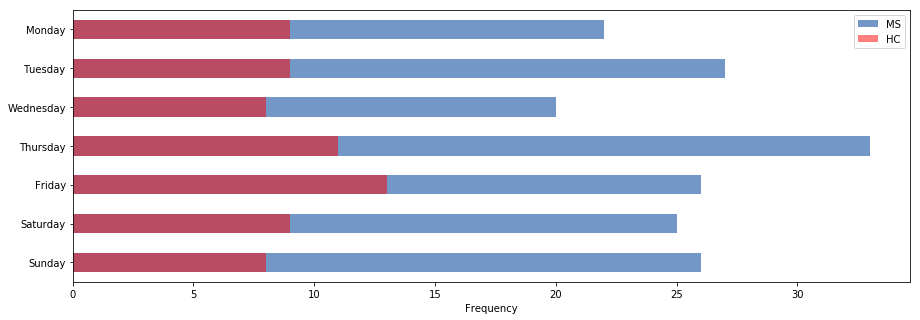

In [400]:
plt.figure(figsize=[15, 5])

time_counts = df_ms['weekday'].value_counts().sort_index(ascending=False)
time_counts.plot(kind='barh', width=0.5, alpha=0.7, color=color_ms, label='MS')

time_counts = df_hc['weekday'].value_counts().sort_index(ascending=False)
time_counts.plot(kind='barh', width=0.5, alpha=0.5, color=color_hc, label='HC')

ylabels = ['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']
plt.yticks(np.array(range(len(ylabels))), ylabels)
plt.xlabel('Frequency')
plt.legend()
plt.show()

In [385]:
w_ms = df_ms[df_ms['weekday'] < 4]
e_ms = df_ms[df_ms['weekday'] >= 4]
w_hc = df_hc[df_hc['weekday'] < 4]
e_hc = df_hc[df_hc['weekday'] >= 4]

In [386]:
d1 = stms.dCohen(w_ms[score_variable], e_ms[score_variable]).effect_size()
d2 = stms.dCohen(w_hc[score_variable], e_hc[score_variable]).effect_size()
print('Cohen´s d-value: \n MS: {} \n HC: {}'.format(round(d1,3),round(d2,3)))

Cohen´s d-value: 
 MS: 0.012 
 HC: 0.283


It doesn't matter which day on the week the participants respond the test

## 3. Results

The international standars as follows

| Effect size	| $d$-value	| Reference |
|--|--|--|
| Very small | 0.01	| Sawilowsky, 2009|
|Small|	0.20	|Cohen, 1988|
|Medium|	0.50|	Cohen, 1988|
|Large|	0.80|	Cohen, 1988|
|Very large|	1.20|	Sawilowsky, 2009|
|Huge|	2.0|	Sawilowsky, 2009|


Summary table of the results

|Measure Difference|Group 1| Group 2|Cohens d-value|Effect Size|
|---|---|---|---|
|Mean Score MS vs HC | MS: 46.22 (SD 7.88)| HC: 52.92 (SD 8.22)|$d=0.837$|Large|
|Morning vs Afternoon MS | Morning: 45.7 (SD 7.61)| Afternoon: 43.92 (SD 9.33)|$d=0.209 $|Small|
|Morning vs Afternoon HC | Morning: 52.36 (SD 8.82)| Afternoon: 53.53 (SD 8.68)|$d=0.228$|Small|
|Practicing Effect MS | 1rs Test: 41.67 (SD 9.0)| 2nd Test: 46.2 (SD 8.13)|$d=0.529$|Medium|
|Practicing Effect HC | 1rs Test: 45.62 (SD 7.98)|2nd Test: 53.5 (SD 7.76)|$d=1.00$|Large|

- There's a Large difference of scores between MS and HC, we might consider as a different populations  
- There's a Small difference of scores between responding in the morning and afternoon, we might say that perform the test without regarding the time of the day it will be the same results.
- There's a Medium practicing effect on MS group, in the other hand there's a Large practicing effect on HC It seems they learn the test

|Difference in Variance| F-test| p-value|
|---|---|---|
|MS Morning vs Afternoon | F = 77.84% | p=0.11|
|HC Morning vs Afternoon | F = 101.53% | p=0.50|

- We reject the null hypothesis on MS group, so it means that there is 68% greater the variance of scores if the patients respond in the morning, rather than the afternoon.
- In the other hand we can not reject the null hypothesis on the HC group because there's no much data points, that means that we might not say anything about how late the participant in HC perform the test

## 4. Discussion

In the literature there's more than one method to measure the difference between the statistic of two populations, on this study it is been used the d-Cohen's value and the F test for difference in variance